In [1]:
# Importing the libraries 
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt 
%matplotlib inline 


In [56]:
# Loading the data 
df = pd.read_csv('train.csv')

In [3]:
# Looking at the dataset 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# number of rows and columns in our dataset 
df.shape 

(891, 12)

In [5]:
# Complete information of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Checking the datatypes of each columns 
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [8]:
# Having a look on the all the columns present in our dataset 
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
# checking the stastical calculation of the numerical columns of the dataset 
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
# Checking the duplicate rows or data 
df[df.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [13]:
# Checking the missing values in the dataset 
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


After looking at the data for the first time, we should ask yourself a few questions:

* Do I need all of the variables?
* Should I transform any variables?
* Are there NA values, outliers or other strange values?
* Should I create new variables?

For the rest of this lesson we will address each of these questions in the context of this data set.

**Do I need all of the variables?**

In [15]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [16]:
# first column we are having passengerId, lets have a closer look on this column

df['PassengerId'].head(10)

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: PassengerId, dtype: int64

In [17]:
df['PassengerId'].describe()

count    891.000000
mean     446.000000
std      257.353842
min        1.000000
25%      223.500000
50%      446.000000
75%      668.500000
max      891.000000
Name: PassengerId, dtype: float64

* As we can see that passengerId does not contain any pattern by it is just acting like a index, so we can delete it 

In [57]:
del df['PassengerId']

In [19]:
df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# As our goalis to predict the survial, so we should definetly keep the Survived, Pclass,Sex, Age, and Fare 
# Rest of the columns , we can have a look on that in order to decide whether to keep it or not


In [20]:
# Let's have a look on the name column

df['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [21]:
df['Name'].describe()

count                         891
unique                        891
top       Braund, Mr. Owen Harris
freq                            1
Name: Name, dtype: object

* Since name column is haiving 891 uniue value so we can't consider it to change into the categorical value, so it is better to delete it 

In [58]:
del df['Name']

In [23]:
df.head(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S


In [24]:
# Now have a closer inspection on the Ticket column

df['Ticket'].head(10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

In [25]:
df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

* So it is having 681 unique value and also it is not following any pattern so it is better to del it 

In [59]:
del df['Ticket']

In [27]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S


In [28]:
# now cheking the cabin column

df['Cabin'].head(10)

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
8     NaN
9     NaN
Name: Cabin, dtype: object

In [29]:
df['Cabin'].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

* Cabin column is also not following any pattern and haiving the 147 unique values , so it is better to drop it 

In [30]:
del df['Cabin']

In [31]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


* Checking for the each columns unique value

**Should I transform any variables?**

In [32]:
df['Pclass'].nunique()

3

In [33]:
df['SibSp'].nunique()

7

In [34]:
df['Parch'].nunique()

7

In [35]:
df['Embarked'].nunique()

3

In [36]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [37]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


As we can see that the Survived column haiving only two values 0 and 1,


In [44]:
n_Sur = pd.Categorical(df['Survived'])

n_Sur = n_Sur.rename_categories(['Died','Survived'])

n_Sur.describe()

,counts,freqs
categories,,
Died,549,0.616162
Survived,342,0.383838


In [38]:
df['Pclass'].unique()  #pclass is also having only three categorical value 

array([3, 1, 2], dtype=int64)

In [95]:
n_Pclass  = pd.Categorical(df['Pclass'],ordered = True)

n_Pclass = n_Pclass.rename_categories(['class1','class2','class3'])

n_Pclass.describe()

,counts,freqs
categories,,
class1,216,0.242424
class2,184,0.206510
class3,491,0.551066


In [96]:
df['Pclass'] = n_Pclass

In [60]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S


In [62]:
# Now we are going to inspect the cabin column.
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

* By looking at the result we can say that cabin column can be group together on the basis oof their first letter, Let's make this change 

In [65]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [67]:
char_cabin = df['Cabin'].astype(str) # Converting the object data type to string 
new_cabin = np.array([cabin[0] for cabin in char_cabin])  # Taking the first character 

In [68]:
new_cabin 

array(['n', 'C', 'n', 'C', 'n', 'n', 'E', 'n', 'n', 'n', 'G', 'C', 'n',
       'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'D', 'n', 'A', 'n', 'n',
       'n', 'C', 'n', 'n', 'n', 'B', 'n', 'n', 'n', 'n', 'n', 'n', 'n',
       'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n',
       'D', 'n', 'B', 'C', 'n', 'n', 'n', 'n', 'n', 'B', 'C', 'n', 'n',
       'n', 'F', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'F', 'n', 'n',
       'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'C', 'n', 'n',
       'n', 'E', 'n', 'n', 'n', 'A', 'D', 'n', 'n', 'n', 'n', 'D', 'n',
       'n', 'n', 'n', 'n', 'n', 'n', 'C', 'n', 'n', 'n', 'n', 'n', 'n',
       'n', 'B', 'n', 'n', 'n', 'n', 'E', 'D', 'n', 'n', 'n', 'F', 'n',
       'n', 'n', 'n', 'n', 'n', 'n', 'D', 'C', 'n', 'B', 'n', 'n', 'n',
       'n', 'n', 'n', 'n', 'n', 'F', 'n', 'n', 'C', 'n', 'n', 'n', 'n',
       'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'E', 'n', 'n',
       'n', 'B', 'n', 'n', 'n', 'A', 'n', 'n', 'C', 'n', 'n', 'n

In [69]:
new_cabin = pd.Categorical(new_cabin) # Changing the above result into category

In [72]:
new_cabin.describe() # here we have grouped the cabin column 

,counts,freqs
categories,,
A,15,0.016835
B,47,0.052750
C,59,0.066218
D,33,0.037037
E,32,0.035915
F,13,0.014590
G,4,0.004489
T,1,0.001122
n,687,0.771044


In [74]:
df['Cabin'] = new_cabin

In [75]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,n,S
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,n,S


**Are there NA Values, Outliers or Other Strange Values?**

In [76]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin         0
Embarked      2
dtype: int64

In [78]:
# So in age column we are having 177 missing values, let's 
# check it out 

df[df['Age'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
5,0,3,male,NaN,0,0,8.4583,n,Q
17,1,2,male,NaN,0,0,13.0000,n,S
19,1,3,female,NaN,0,0,7.2250,n,C
26,0,3,male,NaN,0,0,7.2250,n,C
28,1,3,female,NaN,0,0,7.8792,n,Q
...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,n,C
863,0,3,female,NaN,8,2,69.5500,n,S
868,0,3,male,NaN,0,0,9.5000,n,S
878,0,3,male,NaN,0,0,7.8958,n,S


With 177 missing values it's probably not a good idea to throw all those records away. Here are a few ways we could deal with them:

* Replace the null values with 0s
* Replace the null values with some central value like the mean or median
* Impute some other value
* Split the data set into two parts: one set with where records have an Age value and another set where age is null.

Setting missing values in numeric data to zero makes sense in some cases, but it doesn't make any sense here because a person's age can't be zero. Setting all ages to some central number like the median is a simple fix but there's no telling whether such a central number is a reasonable estimate of age without looking at the distribution of ages. For all we know each age is equally common. We can quickly get a sense of the distribution of ages by creating a histogram of the age variable with df.hist():

In [79]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

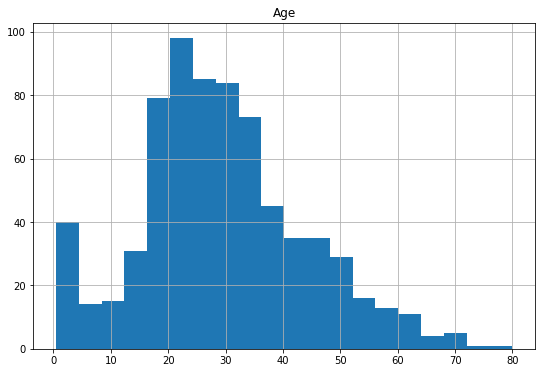

In [81]:
df.hist(column = 'Age',
       figsize = (9,6),
       bins = 20)
plt.show()

* From the histogram we can say that most of the age is between 20 and 30, so we can consider replacing the none value with median value of 28 

In [82]:
new_age_var = np.where(df['Age'].isnull(),
                      28,
                      df['Age'])

In [83]:
df['Age'] = new_age_var

In [84]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,n,S
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,n,S


In [85]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    2
dtype: int64

In [87]:
df[df['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
61,1,1,female,38.0,0,0,80.0,B,NaN
829,1,1,female,62.0,0,0,80.0,B,NaN


<AxesSubplot:>

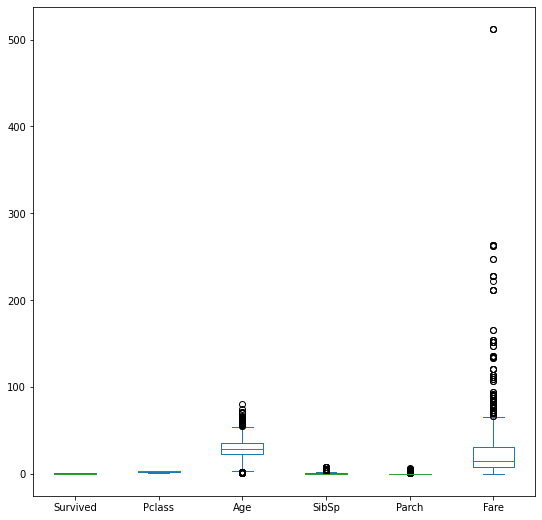

In [88]:
df.plot(kind  = 'box',
       figsize = (9,9))

* From the box plot we can conclude that some of the values in the fare column containing the outliers,this is same as that of the missisn value we can keep it, delete it according to the dataset

**Should I Create New Variables?**

In [97]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,class3,male,22.0,1,0,7.2500,n,S
1,1,class1,female,38.0,1,0,71.2833,C,C
2,1,class3,female,26.0,0,0,7.9250,n,S


The variables present when you load a data set aren't always the most useful variables for analysis. Creating new variables that are derivations or combinations existing ones is a common step to take before jumping into an analysis or modeling task.

In [99]:
# Creating a new column as Family containig all the family members on board:

df['Family'] = df['SibSp'] + df['Parch']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Family, Length: 891, dtype: int64

In [102]:
# Calculate the Family having maximum number of members on board

max_family = np.where(df['Family'] == max(df['Family']))

df.loc[max_family]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family
159,0,class3,male,28.0,8,2,69.55,n,S,10
180,0,class3,female,28.0,8,2,69.55,n,S,10
201,0,class3,male,28.0,8,2,69.55,n,S,10
324,0,class3,male,28.0,8,2,69.55,n,S,10
792,0,class3,female,28.0,8,2,69.55,n,S,10
846,0,class3,male,28.0,8,2,69.55,n,S,10
863,0,class3,female,28.0,8,2,69.55,n,S,10


* There are 7 family having 10 members on the board

* At this point now our dataset is ready for analysis